In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv('customer-churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [56]:
df.shape

(7043, 21)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [58]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [59]:
df.drop(columns=['customerID'], inplace=True)

In [60]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [61]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [62]:
df['TotalCharges'] = df['TotalCharges'].replace({" ": "0.0"}).astype(float)

In [63]:
def plot_distribution(df, column):
    plt.figure(figsize=(12, 6))
    plt.subplot(1,2,1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')

    col_mean = df[column].mean()
    col_median = df[column].median()
    plt.axvline(col_mean, color='r', linestyle='--', label='Mean')
    plt.axvline(col_median, color='g', linestyle='--', label='Median')

    plt.legend()

    plt.subplot(1,2,2)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

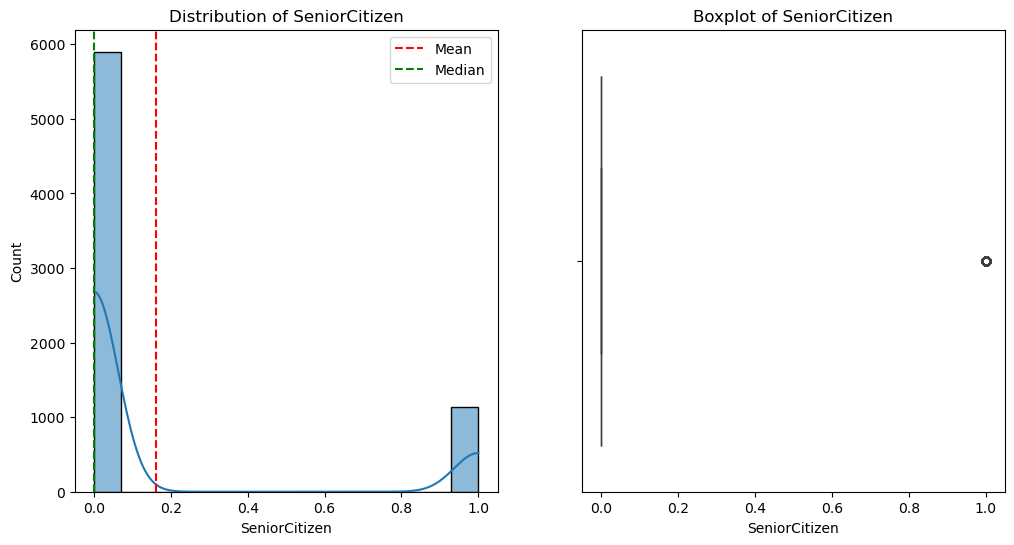

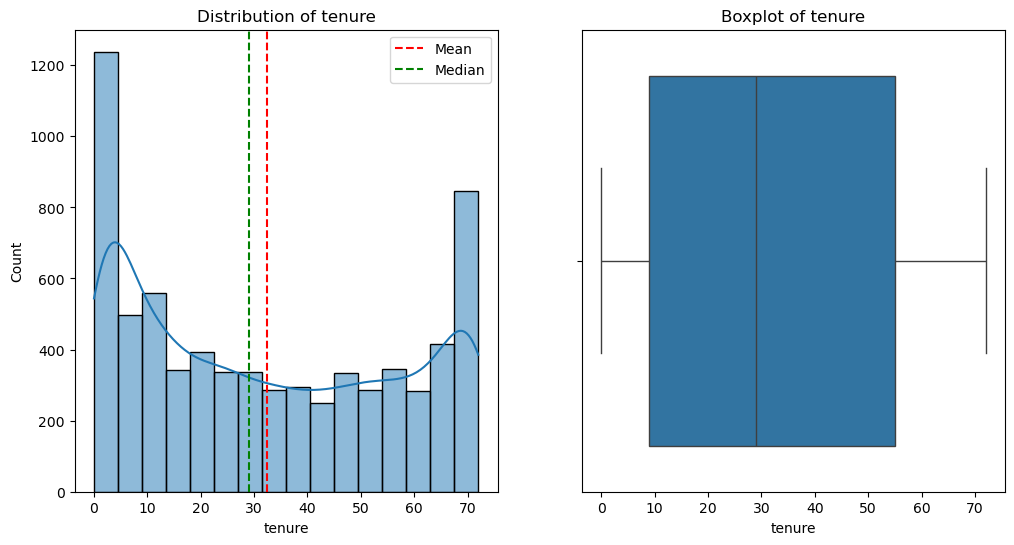

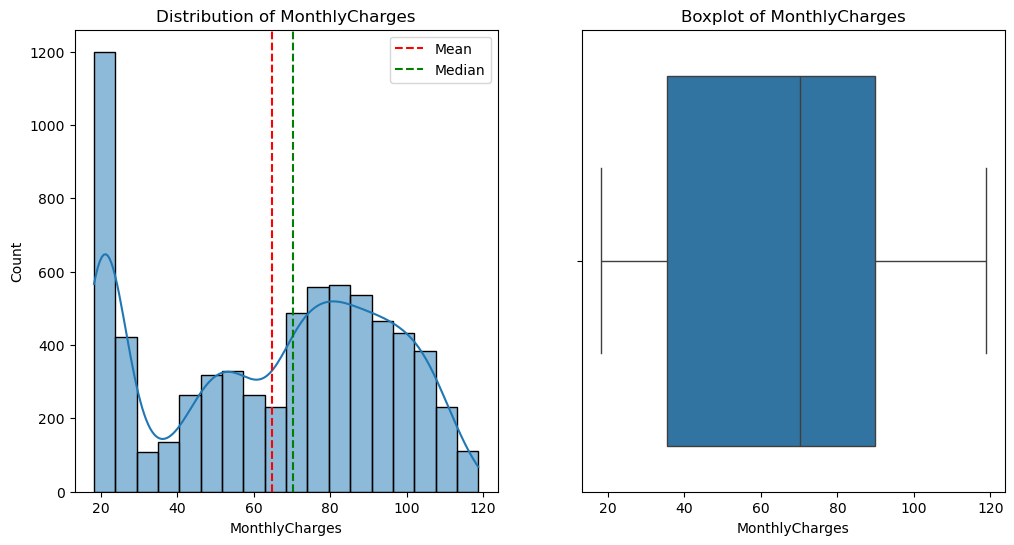

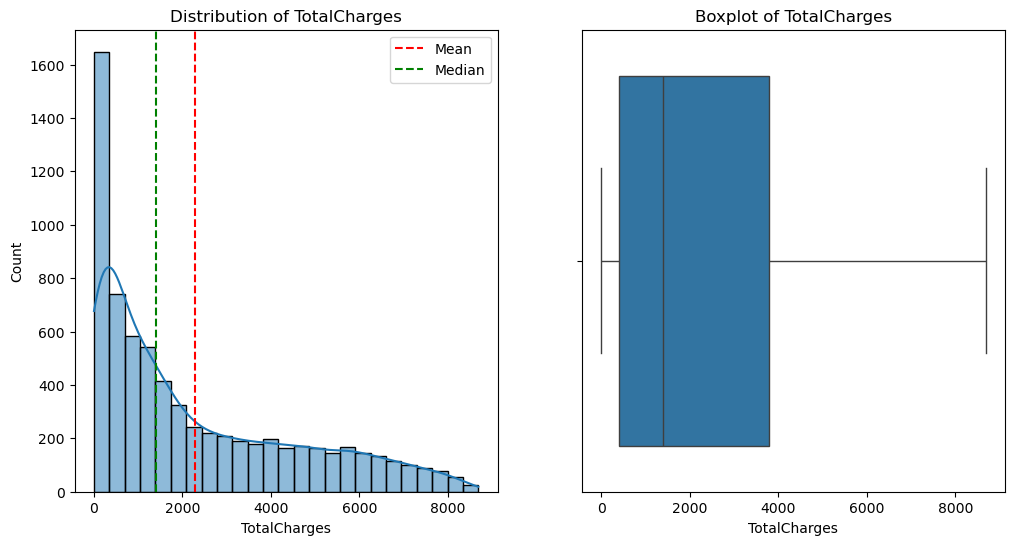

In [64]:
columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
for col in columns:
    plot_distribution(df, col)

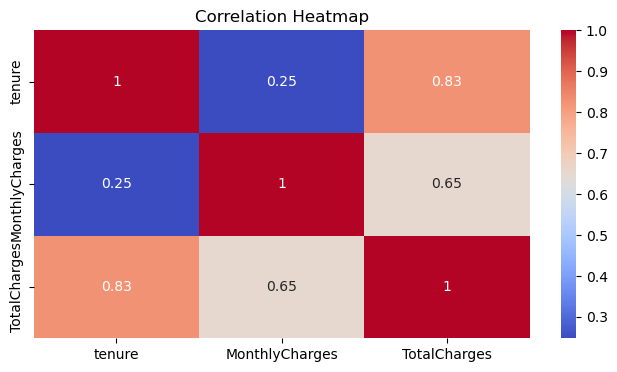

In [65]:
plt.figure(figsize=(8, 4))
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

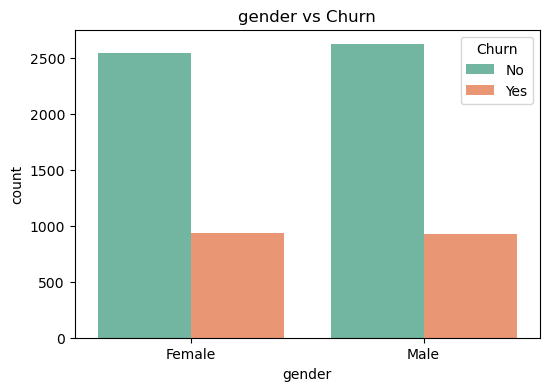

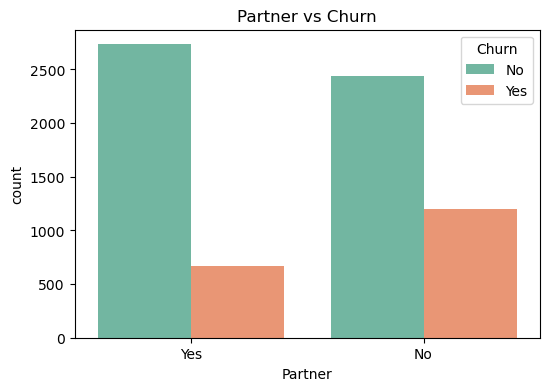

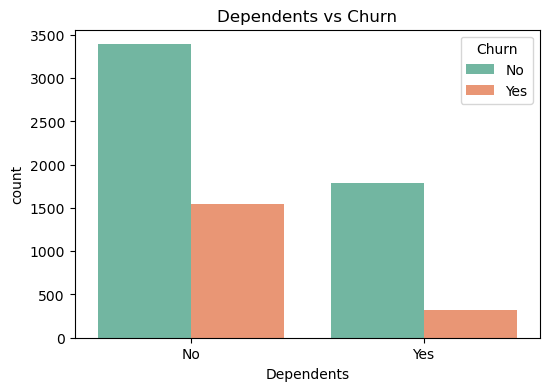

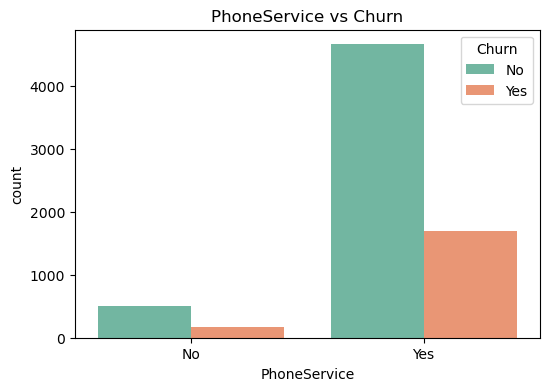

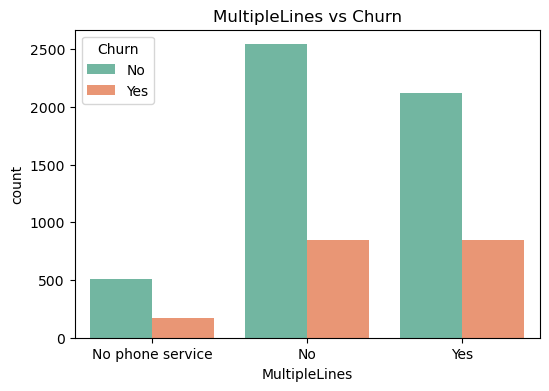

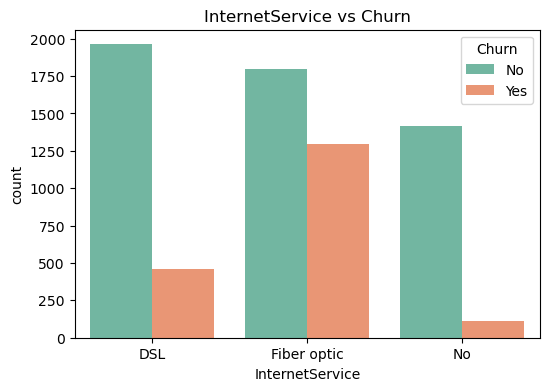

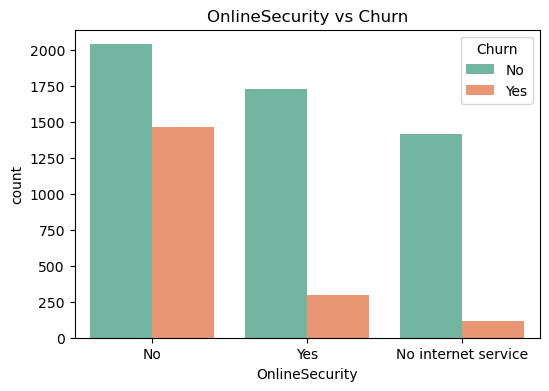

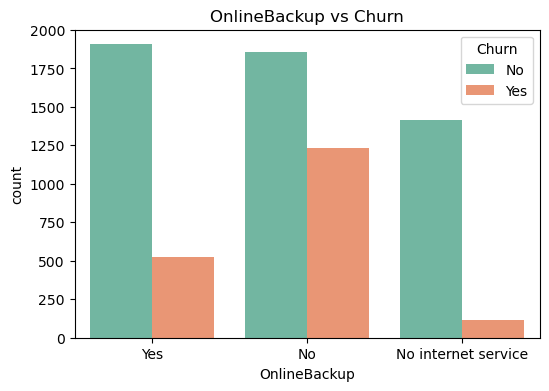

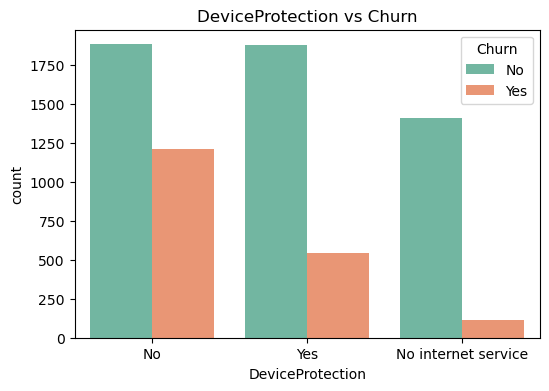

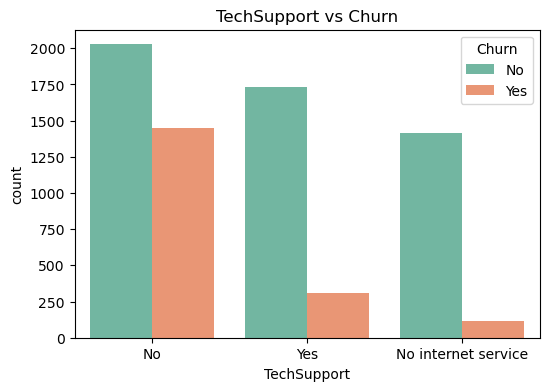

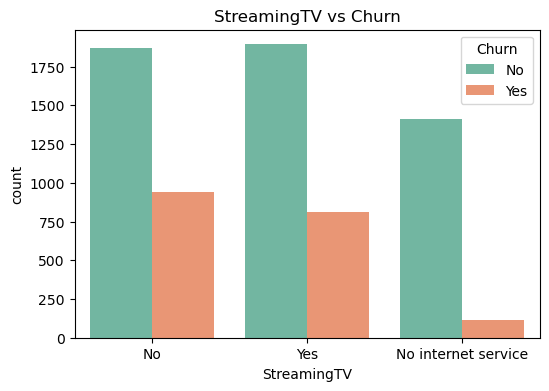

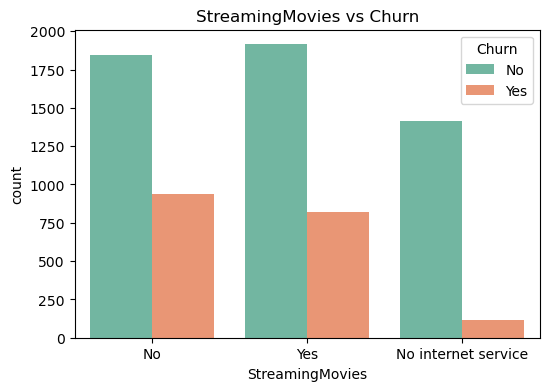

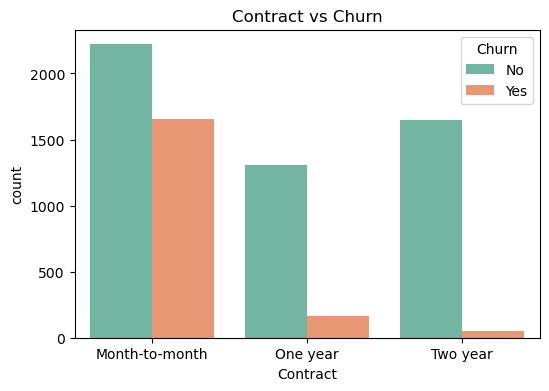

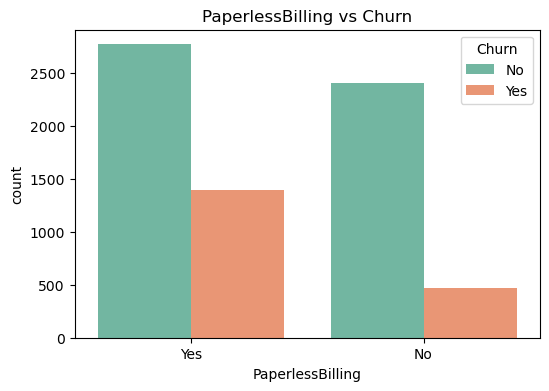

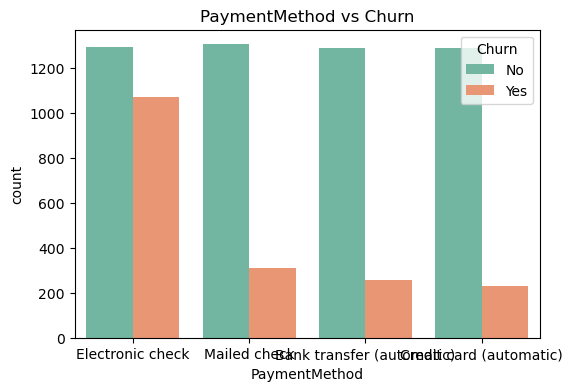

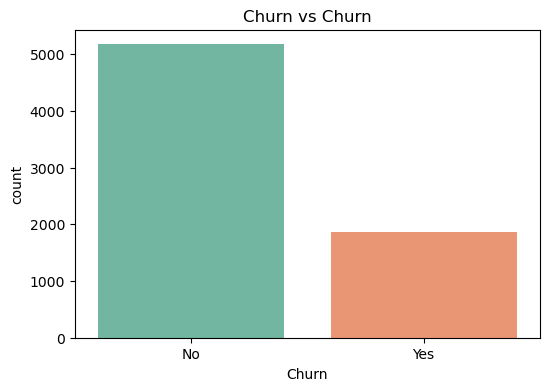

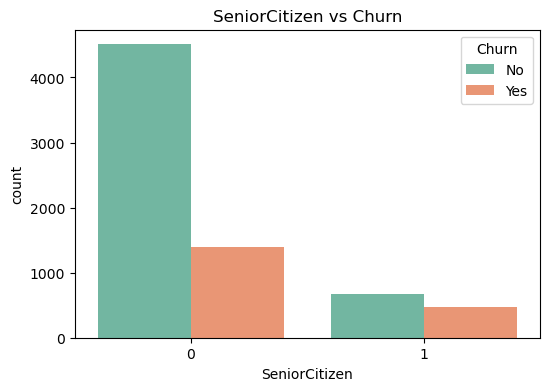

In [66]:
categorical_cols = df.select_dtypes(include=['object']).columns.to_list() + ['SeniorCitizen']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue='Churn', palette='Set2')
    plt.title(f"{col} vs Churn")
    plt.show()

In [67]:
## Label Encoding
df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})

/var/folders/2g/_y68sjz94g9fc6j4lp69mr900000gn/T/ipykernel_89904/3514543298.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [69]:
object_cols = df.select_dtypes(include=['object']).columns

In [70]:
object_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [71]:
from sklearn.preprocessing import LabelEncoder

encoders = {}

for col in object_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

In [92]:
import pickle
with open("encoder.pkl", "wb") as f:
    pickle.dump(encoders, f)

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [95]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.992611,0
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.172165,0
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.958066,1
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.193672,0
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.938874,1


In [96]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [97]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
smote = SMOTE(random_state=42)

In [100]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [101]:
models = {
    "Random Forest" : RandomForestClassifier(n_jobs=-1, random_state=42),
    "SVC" : SVC(probability=True, random_state=42)
}

In [102]:
hyperparameters = {
    "Random Forest" : {
        "n_estimators" : [50, 100, 200],
        "max_depth" : [5, 10, 20, None]
    },
    "SVC" : {
        "kernel" : ['linear', 'poly', 'rbf'],
        "gamma" : ['scale', 'auto']
    }
}

In [103]:
from sklearn.model_selection import GridSearchCV

best_model = {}

for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    grid = GridSearchCV(estimator=model, param_grid=hyperparameters[model_name], scoring="accuracy", cv=3, n_jobs=-1, verbose=1)
    grid.fit(X_train_smote, y_train_smote)
    best_model[model_name] = grid.best_estimator_
    print(f"Best parameters for {model_name}: {grid.best_params_}")
    print(f"Best accuracy for {model_name}: {grid.best_score_:.4f}")

Tuning Random Forest...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters for Random Forest: {'max_depth': 20, 'n_estimators': 100}
Best accuracy for Random Forest: 0.8345
Tuning SVC...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters for SVC: {'gamma': 'scale', 'kernel': 'rbf'}
Best accuracy for SVC: 0.7847


In [104]:
import pickle
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model['Random Forest'], f)

In [105]:
y_test_pred = best_model['Random Forest'].predict(X_test)

In [106]:
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"ROC AUC score: {roc_auc_score(y_test, y_test_pred):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_test_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_test_pred)}")

Accuracy: 0.7693
ROC AUC score: 0.7291
Confusion Matrix:
[[844 192]
 [133 240]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1036
           1       0.56      0.64      0.60       373

    accuracy                           0.77      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.78      0.77      0.77      1409



In [107]:
with open("best_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)
with open("encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)
with open("scaler.pkl", "wb") as f:
    scaler_data = pickle.dump(scaler, f)

In [108]:
def make_prediction(input_data):
    input_df = pd.DataFrame([input_data])
    for col, encoder in encoders.items():
        input_df[col] = encoder.transform(input_df[col])
    numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    prediction = loaded_model.predict(input_df)[0]
    probability = loaded_model.predict_proba(input_df)[0,1]
    return "Churn" if prediction == 1 else "No Churn", probability

In [109]:
example_input = {
    'gender' : 'Female',
    'SeniorCitizen' : 0,
    'Partner' : 'Yes',
    'Dependents' : 'No',
    'tenure' : 5,
    'PhoneService' : 'Yes',
    'MultipleLines' : 'No phone service',
    'InternetService' : 'DSL',
    'OnlineSecurity' : 'No',
    'OnlineBackup' : 'No',
    'DeviceProtection' : 'No',
    'TechSupport' : 'No',
    'StreamingTV' : 'No',
    'StreamingMovies' : 'No',
    'Contract' : 'Month-to-month',
    'PaperlessBilling' : 'Yes',
    'PaymentMethod' : 'Electronic check',
    'MonthlyCharges' : 70.35,
    'TotalCharges' : 350.75
}

In [110]:
prediction, probability = make_prediction(example_input)

In [111]:
print(f"Prediction: {prediction}, Probability: {probability:.4f}")

Prediction: No Churn, Probability: 0.4100
